In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import helper_methods
import yfinance

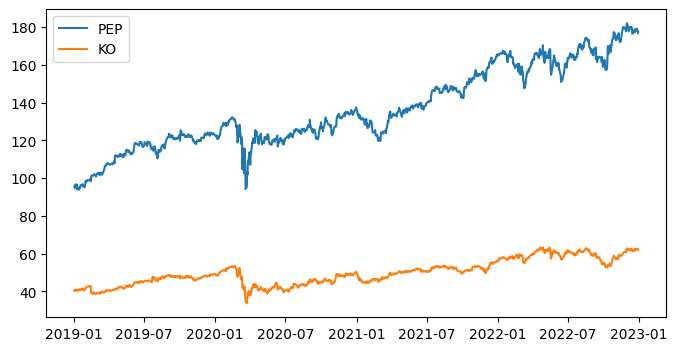

Date
2019-01-02 00:00:00-05:00     95.587547
2019-01-03 00:00:00-05:00     94.695335
2019-01-04 00:00:00-05:00     96.637169
2019-01-07 00:00:00-05:00     95.806213
2019-01-08 00:00:00-05:00     96.724648
                                ...    
2022-12-23 00:00:00-05:00    178.524826
2022-12-27 00:00:00-05:00    179.318237
2022-12-28 00:00:00-05:00    178.025269
2022-12-29 00:00:00-05:00    178.250549
2022-12-30 00:00:00-05:00    176.957611
Name: Close, Length: 1008, dtype: float64

In [13]:
#plot the two assets
df_1 = helper_methods.get_stock_prices("PEP", "2019-01-01", "2023-01-01")
df_2 = helper_methods.get_stock_prices("KO", "2019-01-01", "2023-01-01")
PEP = df_1['Close']
KO = df_2['Close']

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(PEP, label = 'PEP')
ax.plot(KO, label = 'KO')
ax.legend()
plt.show()
PEP

In [14]:
#we can see that PEP and KO roughly move together, but because of price difference, PEP is moving a lot more than KO
print('PEP mean is ' + str(np.mean(PEP)))
print('KO mean is ' + str(np.mean(KO)))

PEP mean is 136.28003800104534
KO mean is 49.828775277213445


Coefficient is 0.14956024905256765


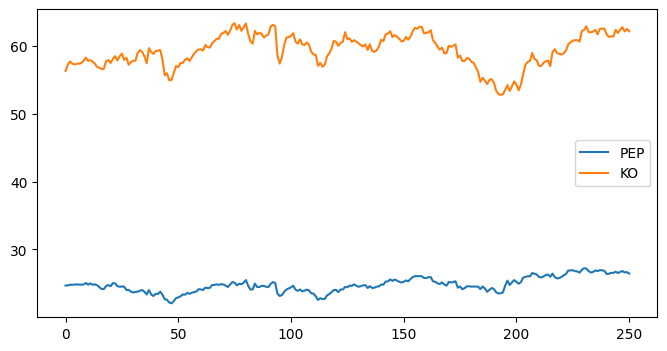

In [8]:
#Each of PEP's movements will be approximately 2.5 times greater than KO, so we can address this by using linear regression to calculate a coefficient for the linear combination between PEP and KO
PEP = sm.add_constant(PEP)
results = sm.OLS(KO, PEP).fit()
PEP = PEP['Close']
b = results.params['Close']
print('Coefficient is ' + str(b))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(PEP * b, label = 'PEP')
ax.plot(KO, label = 'KO')
ax.legend()
plt.show()